# 1. Introduction

#### This project analyzes Netflix's public dataset to explore content types, genres, ratings, and regional production trends.
#### Skills demonstrated: data cleaning, exploratory data analysis (EDA), business insight generation.

# 2. Data Loading and Initial Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:


df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
# Check data structure
df.info()

# Check missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

# 3. Data Cleaning

In [4]:
# Fix Date, some dates have extra spaces in the front

# Remove leading/trailing spaces in 'date_added'
df['date_added'] = df['date_added'].str.strip()

# Now convert to datetime
df['date_added'] = pd.to_datetime(df['date_added'])

In [5]:
## Deal with missing data

# Fill missing values
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Unknown')
df['duration'] = df['duration'].fillna('Unknown')

# Drop rows with missing 'date_added'
df = df.dropna(subset=['date_added'])

In [6]:
# Check data again
df.info()

# Check missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 8797 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8797 non-null   object        
 1   type          8797 non-null   object        
 2   title         8797 non-null   object        
 3   director      8797 non-null   object        
 4   cast          8797 non-null   object        
 5   country       8797 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8797 non-null   int64         
 8   rating        8797 non-null   object        
 9   duration      8797 non-null   object        
 10  listed_in     8797 non-null   object        
 11  description   8797 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 893.4+ KB


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# 4. Exploratory Data Analysis (EDA)

### What is the distribution of TV Shows vs Movies?

In [7]:
# Count types
df['type'].value_counts()

type
Movie      6131
TV Show    2666
Name: count, dtype: int64

<Axes: title={'center': 'Distribution of TV Shows vs Movies'}, xlabel='type'>

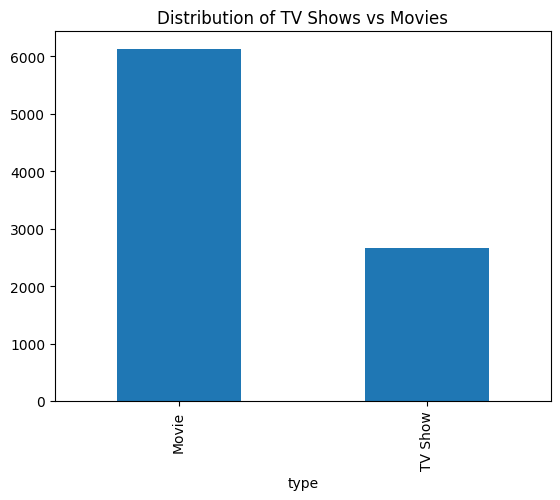

In [8]:
df['type'].value_counts().plot(kind='bar', title='Distribution of TV Shows vs Movies')

#### Movies account for approximately 70% of the total content on Netflix, while TV Shows account for the remaining 30%.

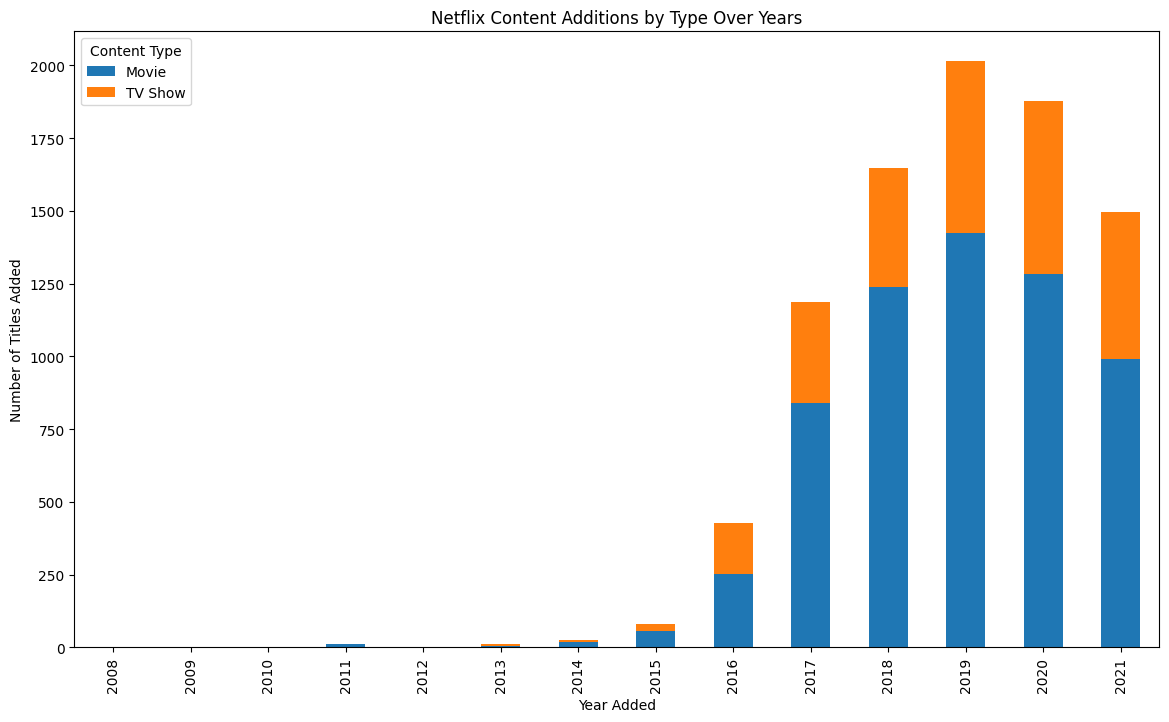

In [9]:
# Extract year when content was added to Netflix
df['year_added'] = df['date_added'].dt.year

# Group by year and type (Movie or TV Show), then count
content_trend = df.groupby(['year_added', 'type']).size().unstack()

# Plotting
content_trend.plot(kind='bar', stacked=True, figsize=(14,8), title='Netflix Content Additions by Type Over Years')

plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.legend(title='Content Type')
plt.show()

In [10]:
# Group by year_added and type, then count
content_counts = df.groupby(['year_added', 'type']).size().unstack(fill_value=0)

# Display TV Shows only
print(content_counts)

type        Movie  TV Show
year_added                
2008            1        1
2009            2        0
2010            1        0
2011           13        0
2012            3        0
2013            6        5
2014           19        5
2015           56       26
2016          253      176
2017          839      349
2018         1237      412
2019         1424      592
2020         1284      595
2021          993      505


#### Although Movies consistently outnumbered TV Shows, the number of TV Shows added each year grew significantly after 2016.
#### By 2019–2021, TV Shows made up over 30% of new content, highlighting Netflix’s strategic shift toward serialized content.

### What are the Top 10 countries producing content?

In [11]:
# Top countries
df['country'].value_counts().head(10)

country
United States     2812
India              972
Unknown            830
United Kingdom     418
Japan              244
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64

<Axes: title={'center': 'Top 10 Content-Producing Countries'}, ylabel='count'>

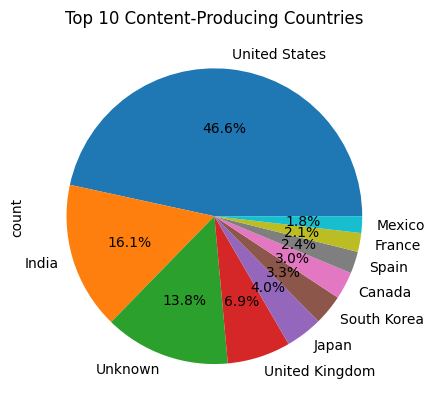

In [12]:
df['country'].value_counts().head(10).plot(kind='pie', autopct='%1.1f%%', title='Top 10 Content-Producing Countries')

#### Netflix’s content is dominated by U.S. productions, but international contributions, especially from India and Europe/Asia, are significant.
#### Data gaps exist with many titles having unknown country origin.

### What are the most common genres?

In [13]:
df['listed_in'].value_counts().head(10)

listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            219
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: count, dtype: int64

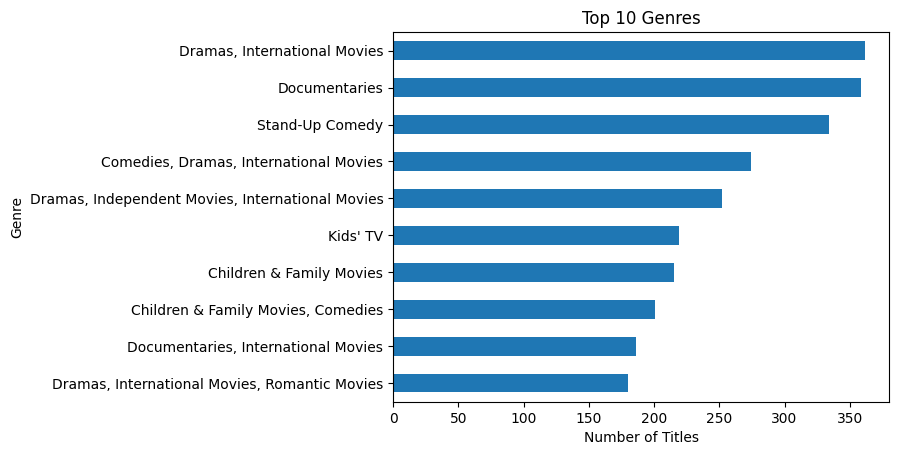

In [14]:
df['listed_in'].value_counts().head(10).sort_values(ascending=True).plot(kind='barh', title='Top 10 Genres')

plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

#### Dramas and Documentaries dominate Netflix’s catalog, along with significant International and Family content categories.

### How has Netflix content grown over the years?

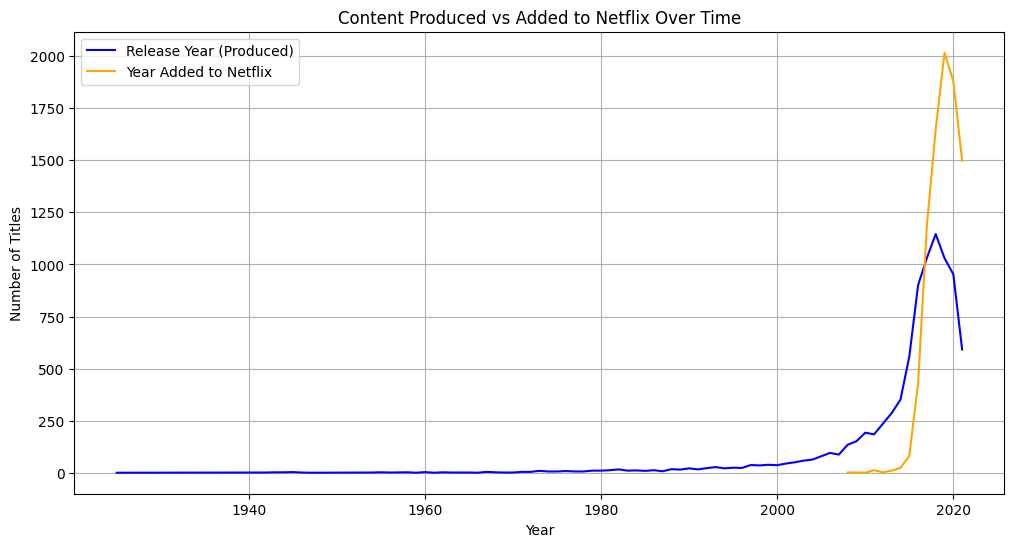

In [15]:

release_year_counts = df['release_year'].value_counts().sort_index()
year_added_counts = df['date_added'].dt.year.value_counts().sort_index()


plt.figure(figsize=(12, 6))

plt.plot(release_year_counts.index, release_year_counts.values, label='Release Year (Produced)', color='blue')
plt.plot(year_added_counts.index, year_added_counts.values, label='Year Added to Netflix', color='orange')

plt.title('Content Produced vs Added to Netflix Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.legend()
plt.grid(True)
plt.show()


#### The majority of content was added between 2016–2020

### What is the average duration for Movies vs TV Shows?

In [16]:
# Make sure you have 'duration_num' first
df['duration_num'] = df['duration'].str.extract(r'(\d+)').astype(float)

# Then split movies and TV shows properly
movies = df[df['type'] == 'Movie'].copy()
tv_shows = df[df['type'] == 'TV Show'].copy()

# For movies: extract main genre
movies['main_genre'] = movies['listed_in'].str.split(',').str[0]
movie_duration = movies.groupby('main_genre')['duration_num'].mean().sort_values(ascending=False)

# For TV Shows: extract main genre
tv_shows['main_genre'] = tv_shows['listed_in'].str.split(',').str[0]
tv_show_duration = tv_shows.groupby('main_genre')['duration_num'].mean().sort_values(ascending=False)

# Display results
print("Movie genres - average duration:")
print(movie_duration.head(10))

print("\nTV Show genres - average seasons:")
print(tv_show_duration.head(10))



Movie genres - average duration:
main_genre
Classic Movies          114.825000
Action & Adventure      113.515716
Dramas                  111.377500
International Movies    108.062500
Comedies                106.687603
Sci-Fi & Fantasy        106.615385
Cult Movies             102.500000
Thrillers                99.953846
LGBTQ Movies             99.000000
Independent Movies       98.700000
Name: duration_num, dtype: float64

TV Show genres - average seasons:
main_genre
Classic & Cult TV               5.250000
TV Comedies                     3.016807
TV Sci-Fi & Fantasy             3.000000
TV Dramas                       2.865672
Romantic TV Shows               2.843750
TV Horror                       2.818182
TV Action & Adventure           2.692308
Stand-Up Comedy & Talk Shows    2.176471
Kids' TV                        1.987047
British TV Shows                1.817460
Name: duration_num, dtype: float64


#### "Classic Movies," "Action & Adventure," and "Dramas" average over 110 minutes, while Comedies and Thrillers are slightly shorter (~100 minutes).

#### "Classic & Cult TV" shows average over 5 seasons, while modern TV genres like "TV Comedies" and "TV Dramas" typically last 2–3 seasons.

### Are Netflix Originals longer or shorter compared to non-originals?

In [17]:
# Create a new column for Original content based on title
df['is_original'] = df['title'].str.contains('Netflix', case=False, na=False)

# Compare average duration
original_duration = df.groupby('is_original')['duration_num'].mean()
print(original_duration)

is_original
False    69.935836
True     35.500000
Name: duration_num, dtype: float64


#### Netflix Originals have a shorter average duration (35 minutes) compared to non-original content (70 minutes).

### Which ratings (PG, R, TV-MA) are most common on Netflix?

rating
TV-MA    3205
TV-14    2157
TV-PG     861
R         799
PG-13     490
TV-Y7     333
TV-Y      306
PG        287
TV-G      220
NR         79
Name: count, dtype: int64


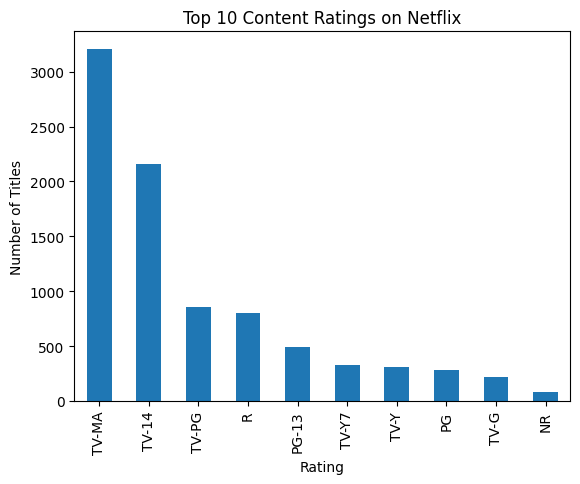

In [18]:
# Count ratings
rating_counts = df['rating'].value_counts()
print(rating_counts.head(10))

# Plot the results
rating_counts.head(10).plot(kind='bar', title='Top 10 Content Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.show()

#### TV-MA rated content dominates Netflix’s catalog, indicating a strong focus on mature audiences.

### Is Netflix adding more adult-rated content over the years?

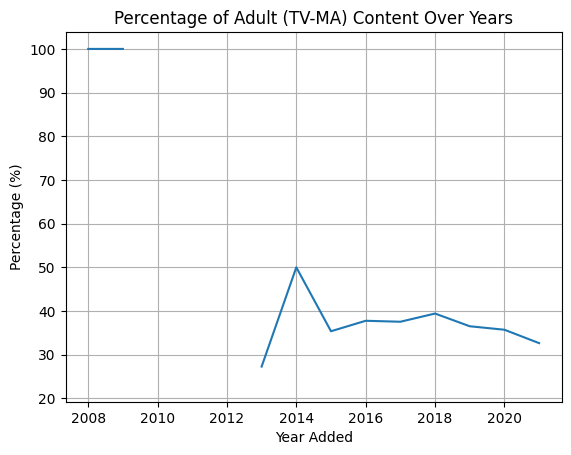

In [19]:
# Number of TV-MA rated titles added each year
adult_content = df[df['rating'] == 'TV-MA'].groupby('year_added').size()

# Total content added each year
total_content = df.groupby('year_added').size()

# Percentage of adult content
adult_ratio = (adult_content / total_content) * 100

# Plot the trend
adult_ratio.plot(kind='line', title='Percentage of Adult (TV-MA) Content Over Years')
plt.xlabel('Year Added')
plt.ylabel('Percentage (%)')
plt.grid(True)
plt.show()


#### After peaking around 50% in 2014, the percentage of adult-rated (TV-MA) content on Netflix stabilized between 30–40% from 2015 onward, with a slight downward trend in recent years.

### For each country, which genre is produced the most.

In [20]:
# Group by (country, genre) and count
country_genre_counts = df.groupby(['country', 'listed_in']).size().reset_index(name='count')

# For each country, get the genre with the highest count
top_genre_per_country = country_genre_counts.sort_values('count', ascending=False).drop_duplicates('country')

# Show the top genre for each country
print(top_genre_per_country.head(10))


             country                                          listed_in  count
2152   United States                                      Documentaries    249
810            India             Comedies, Dramas, International Movies    120
1050           Japan               Anime Series, International TV Shows     75
2653         Unknown                           Children & Family Movies     70
1465     South Korea  International TV Shows, Korean TV Shows, Roman...     63
1771  United Kingdom                                      Documentaries     40
1613          Taiwan  International TV Shows, Romantic TV Shows, TV ...     31
510            Egypt                     Comedies, International Movies     29
1669          Turkey                     Comedies, International Movies     23
1324     Philippines      Dramas, International Movies, Romantic Movies     21


### How has the number of titles added by top countries changed over the years?

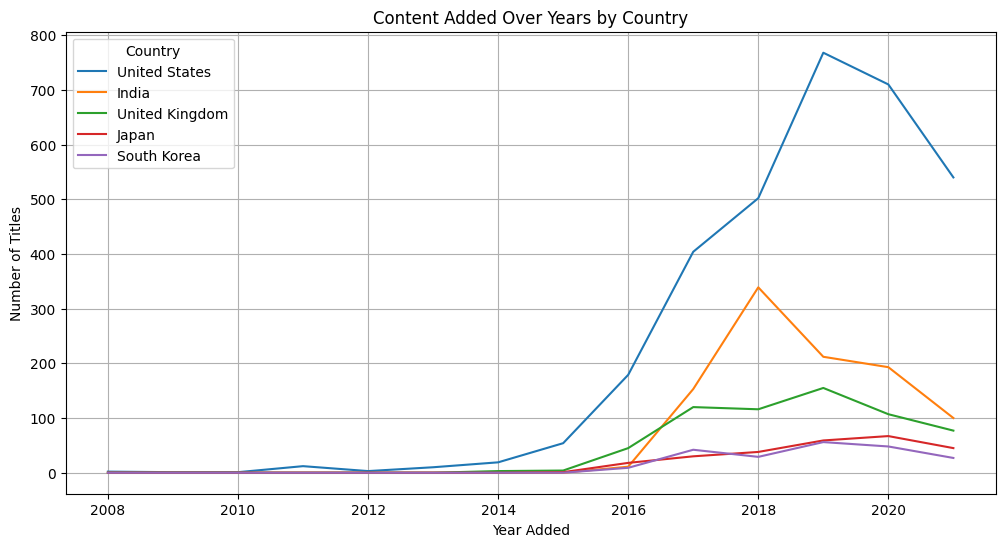

In [21]:
# Keep only the first country if multiple countries listed
df['main_country'] = df['country'].str.split(',').str[0]

# Group by year_added and main_country
country_year = df.groupby(['year_added', 'main_country']).size().unstack(fill_value=0)

# Plot trends for selected top countries
top_countries = ['United States', 'India', 'United Kingdom', 'Japan', 'South Korea']
country_year[top_countries].plot(kind='line', figsize=(12,6), title='Content Added Over Years by Country')

plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.legend(title='Country')
plt.show()

#### The U.S. leads Netflix’s content growth, India surged during 2017–2018, and Japan/South Korea show steady rising trends post-2017.

# 5. Conclusion

#### Netflix’s content catalog has expanded significantly since 2016, with a strong focus on Movies and increasing investment in TV Shows.
#### The U.S. remains the dominant content producer, while India, Japan, and South Korea show strong growth in regional content.
#### Genres like Documentaries, Dramas, and Anime are major pillars across different markets.
#### Although TV-MA (mature) content remains significant, recent years show a slight shift toward broader audience offerings.
#### Overall, Netflix’s strategy reflects a balance between global expansion, regional audience targeting, and content diversification.